In [12]:
import folium
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import osmnx as ox
import numpy as np

/var/folders/xs/8ytvq8397bz3p0mp2cdjyd_40000gn/T/ipykernel_99390/15131718.py:1: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  porto_road = ox.graph_from_bbox(
/var/folders/xs/8ytvq8397bz3p0mp2cdjyd_40000gn/T/ipykernel_99390/15131718.py:1: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  porto_road = ox.graph_from_bbox(


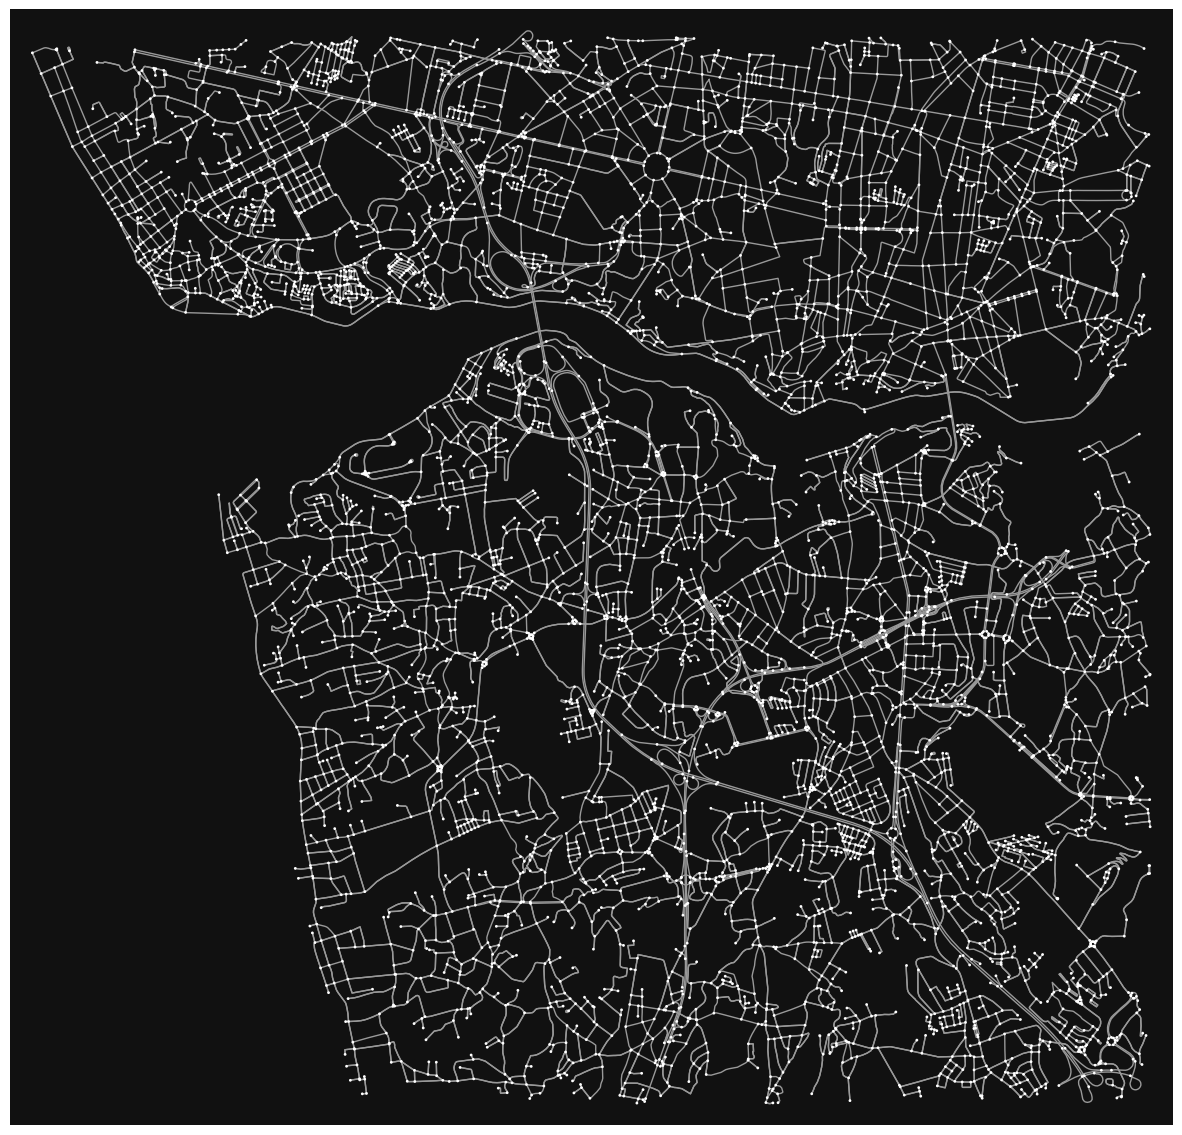

In [5]:
porto_road = ox.graph_from_bbox(
    north=41.167, 
    south=41.092, 
    east=-8.583, 
    west=-8.700, network_type='drive')
fig, ax = ox.plot_graph(porto_road, figsize=(15,15), show=False, close=False, node_size=4)

In [6]:
# Read from data/portocity.csv and draw the polylines for one of the rows
porto_city = pd.read_csv('data/portocity.csv')
print(porto_city.head())

               TRIP_ID CALL_TYPE  ORIGIN_CALL  ORIGIN_STAND   TAXI_ID  \
0  1372636858620000589         C          NaN           NaN  20000589   
1  1372637303620000596         B          NaN           7.0  20000596   
2  1372636951620000320         C          NaN           NaN  20000320   
3  1372636854620000520         C          NaN           NaN  20000520   
4  1372637091620000337         C          NaN           NaN  20000337   

    TIMESTAMP DAY_TYPE  MISSING_DATA  \
0  1372636858        A         False   
1  1372637303        A         False   
2  1372636951        A         False   
3  1372636854        A         False   
4  1372637091        A         False   

                                            POLYLINE  
0  [[-8.618643,41.141412],[-8.618499,41.141376],[...  
1  [[-8.639847,41.159826],[-8.640351,41.159871],[...  
2  [[-8.612964,41.140359],[-8.613378,41.14035],[-...  
3  [[-8.574678,41.151951],[-8.574705,41.151942],[...  
4  [[-8.645994,41.18049],[-8.645949,41.180517

Number of trips:  1710670
Number of points:  83409386


/var/folders/xs/8ytvq8397bz3p0mp2cdjyd_40000gn/T/ipykernel_99390/1860219951.py:17: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  porto_road = ox.graph_from_bbox(
/var/folders/xs/8ytvq8397bz3p0mp2cdjyd_40000gn/T/ipykernel_99390/1860219951.py:17: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  porto_road = ox.graph_from_bbox(


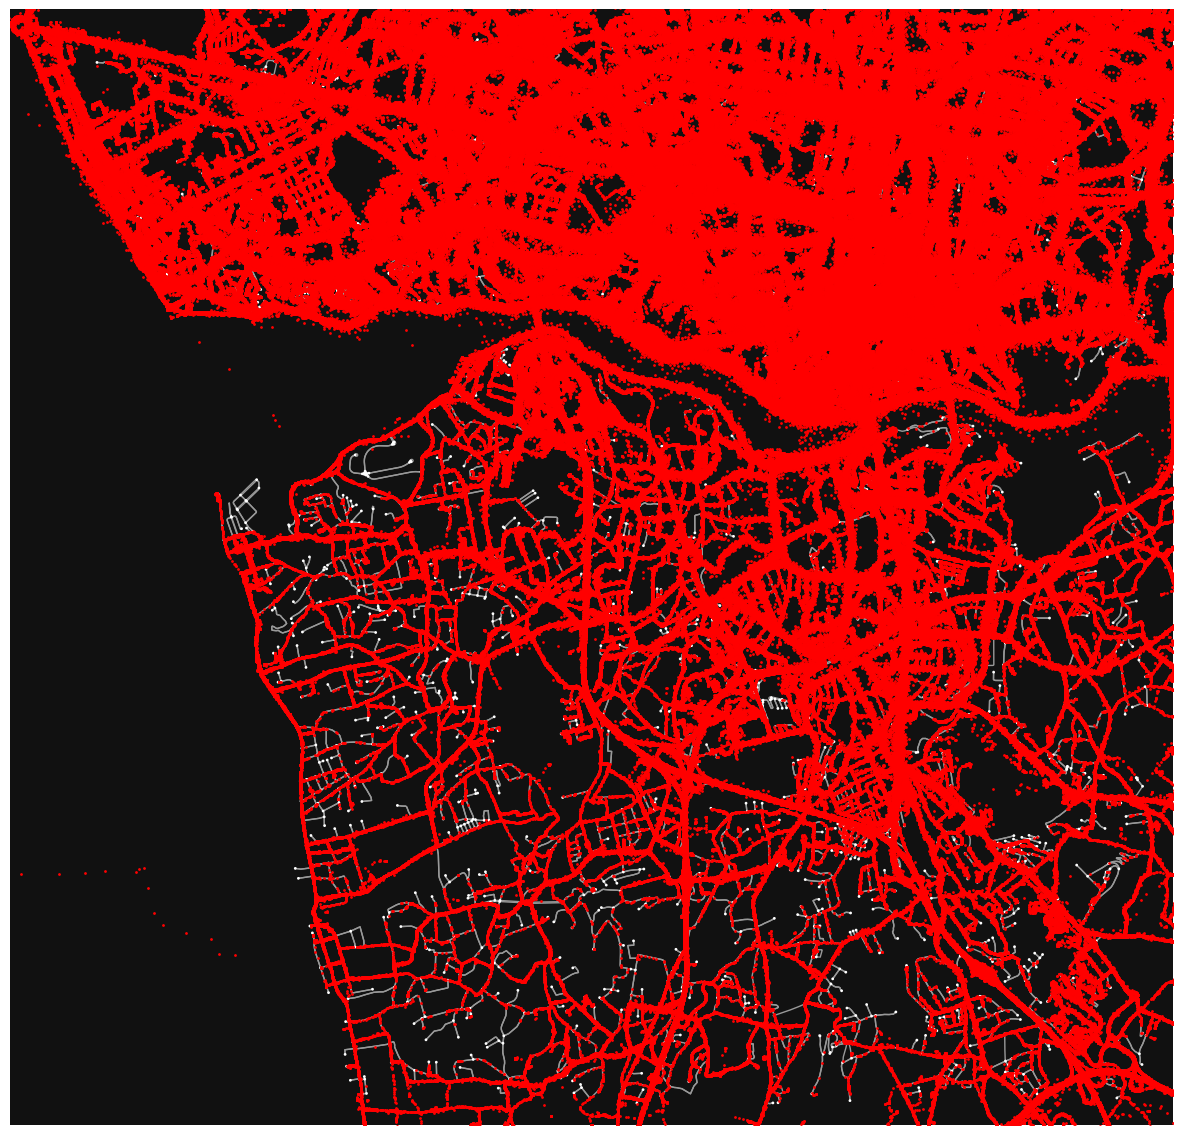

In [9]:
trips = porto_city[porto_city['TAXI_ID'] == 20000589]
# trips = porto_city
print("Number of trips: ", len(trips))

# get a list of lat, lon pairs
lons = []
lats = []
for index, trip in trips.iterrows():
    polyline = trip['POLYLINE']
    polyline = eval(polyline) # [[lon, lat], [lon, lat], ...]
    for point in polyline:
        lons.append(point[0])
        lats.append(point[1])

print("Number of points: ", len(lons))

porto_road = ox.graph_from_bbox(
    north=41.167, 
    south=41.092, 
    east=-8.583, 
    west=-8.700, network_type='drive')
fig, ax = ox.plot_graph(porto_road, figsize=(15,15), show=False, close=False, node_size=4)
ax.scatter(lons, lats, c='red', s=1)
# sns.kdeplot(x=lons, y=lats, ax=ax, cmap="Reds", fill=True, alpha=0.5, bw_adjust=0.5)
plt.show()

Number of start points:  1704769
Number of end points:  1704769


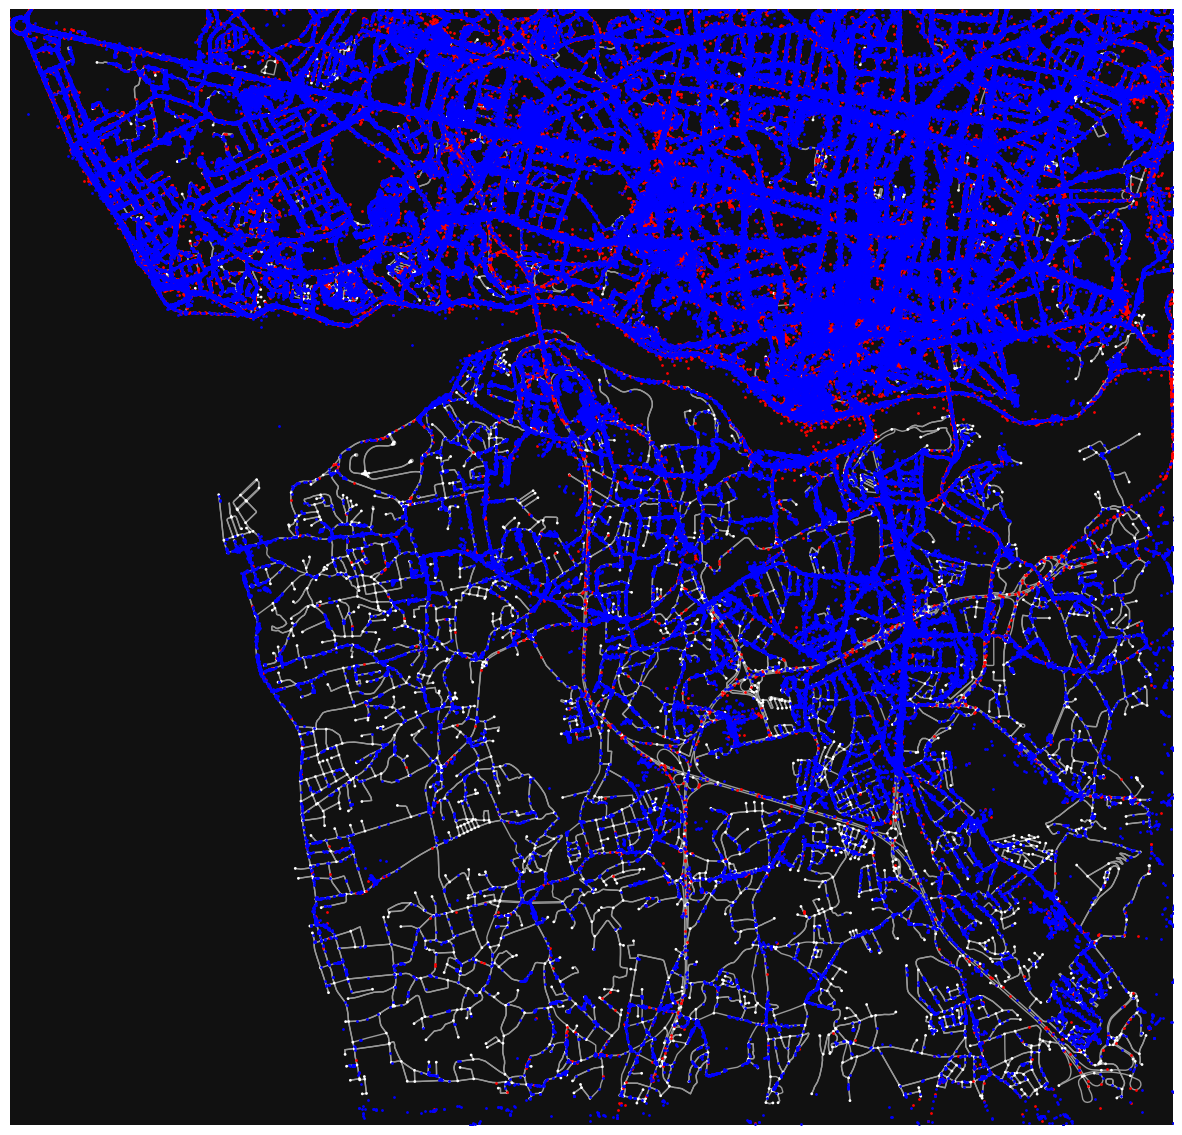

In [11]:
# Start points and end points
start_points = []
end_points = []

trips = porto_city



for index, trip in trips.iterrows():
    polyline = trip['POLYLINE']
    polyline = eval(polyline) # [[lon, lat], [lon, lat], ...]
    if len(polyline) == 0:
        continue
    start_points.append(polyline[0])
    end_points.append(polyline[-1])

print("Number of start points: ", len(start_points))
print("Number of end points: ", len(end_points))

# Plot the start (red) and end (blue) points
fig, ax = ox.plot_graph(porto_road, figsize=(15,15), show=False, close=False, node_size=4)
start_lons, start_lats = zip(*start_points)
end_lons, end_lats = zip(*end_points)
ax.scatter(start_lons, start_lats, c='red', s=1)
ax.scatter(end_lons, end_lats, c='blue', s=1)
plt.show()

In [17]:
# Take a random day and get all the trips for that day (TIMESTAMP is in UNIX)

df = porto_city
df['date'] = pd.to_datetime(df['TIMESTAMP'], unit='s')  # 's' stands for seconds since epoch
df['date_only'] = df['date'].dt.date
random_date = np.random.choice(df['date_only'].unique())
filtered_df = df[df['date_only'] == random_date]

# Print the result
print(f"Randomly selected date: {random_date}")
print(f"Number of rows for {random_date}: {len(filtered_df)}")

# Create a 


Randomly selected date: 2013-09-12
Number of rows for 2013-09-12: 4960
